In [24]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#no wrapping
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)  # Disable line-wrapping




coffea_caff_clim = pd.read_csv(r"..\data\coll_caff_node_clim_w_class.csv")
coffea_caff_env = pd.read_csv(r"..\data\coll_caff_node_env_w_class.csv")

coffee_data = coffea_caff_clim.copy()

#distinct_vals = coffee_data['caffeine_class'].value_counts()
#print(distinct_vals)

coffee_data.drop(columns=['specimen_id','longitude','latitude', 'source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded'],inplace=True)

coffee_data.head

<bound method NDFrame.head of      clim_1_tmin1_Monthly minimum temperature - January (°C x 10)  clim_2_tmin2_Monthly minimum temperature - February (°C x 10)  clim_3_tmin3_Monthly minimum temperature - March (°C x 10)  clim_4_tmin4_Monthly minimum temperature - April (°C x 10)  clim_5_tmin5_Monthly minimum temperature - May (°C x 10)  clim_6_tmin6_Monthly minimum temperature - June (°C x 10)  clim_7_tmin7_Monthly minimum temperature - July (°C x 10)  clim_8_tmin8_Monthly minimum temperature - August (°C x 10)  clim_9_tmin9_Monthly minimum temperature - September (°C x 10)  clim_10_tmin10_Monthly minimum temperature - October (°C x 10)  ...  clim_62_pet7_Monthly potential evapotranspiration from the Thornthwaite equation - July (mm.month-1)  clim_63_pet8_Monthly potential evapotranspiration from the Thornthwaite equation - August (mm.month-1)  clim_64_pet9_Monthly potential evapotranspiration from the Thornthwaite equation - September (mm.month-1)  clim_65_pet10_Monthly potential evapo

In [43]:
headers = coffee_data.columns
headers.to_series().to_csv(r'../data/column_headers.csv', index=False, header=False)


In [64]:

coffee_data.columns = (coffee_data.columns
              .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters like °, parentheses, hyphen
              .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
              .str.strip())                             # Strip leading and trailing spaces


mapping_df = pd.read_csv(r'../data/column_mapping.csv')

mapping_df['old_name'] = (mapping_df['old_name']
                          .str.replace(r'[^\w\s]', '', regex=True)  # Clean the old names similarly
                          .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
                          .str.strip())
mapping_df

# Create the mapping dictionary
mapping_dict = dict(zip(mapping_df['old_name'], mapping_df['new_name']))

# Rename columns in the DataFrame using the cleaned mapping
coffee_data.rename(columns=mapping_dict, inplace=True)
coffee_data.columns

Index(['clim_1_tmin1_jan', 'clim_2_tmin2_feb', 'clim_3_tmin3_mar', 'clim_4_tmin4_apr', 'clim_5_tmin5_may', 'clim_6_tmin6_jun', 'clim_7_tmin7_jul', 'clim_8_tmin8_aug', 'clim_9_tmin9_sep', 'clim_10_tmin10_oct', 'clim_11_tmin11_nov', 'clim_12_tmin12_dec', 'clim_13_tmax1_jan', 'clim_14_tmax2_feb', 'clim_15_tmax3_mar', 'clim_16_tmax4_apr', 'clim_17_tmax5_may', 'clim_18_tmax6_jun', 'clim_19_tmax7_jul', 'clim_20_tmax8_aug', 'clim_21_tmax9_sep', 'clim_22_tmax10_oct', 'clim_23_tmax11_nov', 'clim_24_tmax12_dec', 'clim_25_prec1_jan', 'clim_26_prec2_feb', 'clim_27_prec3_mar', 'clim_28_prec4_apr', 'clim_29_prec5_may', 'clim_30_prec6_jun', 'clim_31_prec7_jul', 'clim_32_prec8_aug', 'clim_33_prec9_sep', 'clim_34_prec10_oct', 'clim_35_prec11_nov', 'clim_36_prec12_dec', 'clim_37_ann_mean_temp', 'clim_38_mean_diurn_range', 'clim_39_isotherm', 'clim_40_temp_season', 'clim_41_tmax_warmest_m', 'clim_42_tmin_coldest_m', 'clim_43_tannual_range', 'clim_44_tmean_wettest_q', 'clim_45_tmean_driest_q',
       'cli

In [37]:
pd.set_option('display.max_rows', None)


In [65]:
missing_data = coffee_data.isnull().sum()
missing_data

clim_1_tmin1_jan            0
clim_2_tmin2_feb            0
clim_3_tmin3_mar            0
clim_4_tmin4_apr            0
clim_5_tmin5_may            0
clim_6_tmin6_jun            0
clim_7_tmin7_jul            0
clim_8_tmin8_aug            0
clim_9_tmin9_sep            0
clim_10_tmin10_oct          0
clim_11_tmin11_nov          0
clim_12_tmin12_dec          0
clim_13_tmax1_jan           0
clim_14_tmax2_feb           0
clim_15_tmax3_mar           0
clim_16_tmax4_apr           0
clim_17_tmax5_may           0
clim_18_tmax6_jun           0
clim_19_tmax7_jul           0
clim_20_tmax8_aug           0
clim_21_tmax9_sep           0
clim_22_tmax10_oct          0
clim_23_tmax11_nov          0
clim_24_tmax12_dec          0
clim_25_prec1_jan           0
clim_26_prec2_feb           0
clim_27_prec3_mar           0
clim_28_prec4_apr           0
clim_29_prec5_may           0
clim_30_prec6_jun           0
clim_31_prec7_jul           0
clim_32_prec8_aug           0
clim_33_prec9_sep           0
clim_34_pr

In [66]:
cleaned_data = coffee_data.dropna()
coffee_data = cleaned_data.copy()
coffee_data.isnull().sum()

clim_1_tmin1_jan            0
clim_2_tmin2_feb            0
clim_3_tmin3_mar            0
clim_4_tmin4_apr            0
clim_5_tmin5_may            0
clim_6_tmin6_jun            0
clim_7_tmin7_jul            0
clim_8_tmin8_aug            0
clim_9_tmin9_sep            0
clim_10_tmin10_oct          0
clim_11_tmin11_nov          0
clim_12_tmin12_dec          0
clim_13_tmax1_jan           0
clim_14_tmax2_feb           0
clim_15_tmax3_mar           0
clim_16_tmax4_apr           0
clim_17_tmax5_may           0
clim_18_tmax6_jun           0
clim_19_tmax7_jul           0
clim_20_tmax8_aug           0
clim_21_tmax9_sep           0
clim_22_tmax10_oct          0
clim_23_tmax11_nov          0
clim_24_tmax12_dec          0
clim_25_prec1_jan           0
clim_26_prec2_feb           0
clim_27_prec3_mar           0
clim_28_prec4_apr           0
clim_29_prec5_may           0
clim_30_prec6_jun           0
clim_31_prec7_jul           0
clim_32_prec8_aug           0
clim_33_prec9_sep           0
clim_34_pr

First Pass of *Random Forest cliassifier* Without Removing Correlated Features

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'caffeine_class' is your target variable and X contains the features
X = coffee_data.drop(columns=['caffeine_class'])  # Replace with actual feature columns
y = coffee_data['caffeine_class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#criterion='entropy',
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Pair feature names with their importance scores
features = X.columns
important_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Display the most important features
for feature, importance in important_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")



Feature: clim_34_prec10_oct, Importance: 0.0375
Feature: clim_56_pet1_jan, Importance: 0.0321
Feature: clim_14_tmax2_feb, Importance: 0.0309
Feature: clim_10_tmin10_oct, Importance: 0.0260
Feature: clim_60_pet5_may, Importance: 0.0245
Feature: clim_1_tmin1_jan, Importance: 0.0239
Feature: clim_49_prec_wettest_m, Importance: 0.0237
Feature: clim_54_prec_warmest_q, Importance: 0.0217
Feature: clim_25_prec1_jan, Importance: 0.0214
Feature: clim_28_prec4_apr, Importance: 0.0210
Feature: clim_53_prec_driest_q, Importance: 0.0210
Feature: clim_52_prec_wettest_q, Importance: 0.0209
Feature: clim_61_pet6_jun, Importance: 0.0207
Feature: clim_16_tmax4_apr, Importance: 0.0202
Feature: clim_66_pet11_nov, Importance: 0.0200
Feature: clim_48_Annual_prec, Importance: 0.0200
Feature: clim_12_tmin12_dec, Importance: 0.0200
Feature: clim_42_tmin_coldest_m, Importance: 0.0198
Feature: clim_9_tmin9_sep, Importance: 0.0189
Feature: clim_30_prec6_jun, Importance: 0.0182
Feature: clim_18_tmax6_jun, Importan

In [109]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation (e.g., accuracy)
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy:  0.9223920070526006


In [68]:
# Select the top 10 important features
top_n = 10
important_features = important_features[:top_n]

# Get the feature names only (without the importance score)
important_feature_names = [feature for feature, importance in important_features]

print("Top 10 Important Features:", important_feature_names)
important_feature_names

Top 10 Important Features: ['clim_34_prec10_oct', 'clim_56_pet1_jan', 'clim_14_tmax2_feb', 'clim_10_tmin10_oct', 'clim_60_pet5_may', 'clim_1_tmin1_jan', 'clim_49_prec_wettest_m', 'clim_54_prec_warmest_q', 'clim_25_prec1_jan', 'clim_28_prec4_apr']


['clim_34_prec10_oct',
 'clim_56_pet1_jan',
 'clim_14_tmax2_feb',
 'clim_10_tmin10_oct',
 'clim_60_pet5_may',
 'clim_1_tmin1_jan',
 'clim_49_prec_wettest_m',
 'clim_54_prec_warmest_q',
 'clim_25_prec1_jan',
 'clim_28_prec4_apr']

In [69]:
# Select features with importance greater than a threshold
threshold = 0.03  # Adjust the threshold as needed
important_features_above_threshold = [feature for feature, importance in important_features if importance > threshold]

print("Features above threshold:", important_features_above_threshold)
important_features_above_threshold

Features above threshold: ['clim_34_prec10_oct', 'clim_56_pet1_jan', 'clim_14_tmax2_feb']


['clim_34_prec10_oct', 'clim_56_pet1_jan', 'clim_14_tmax2_feb']

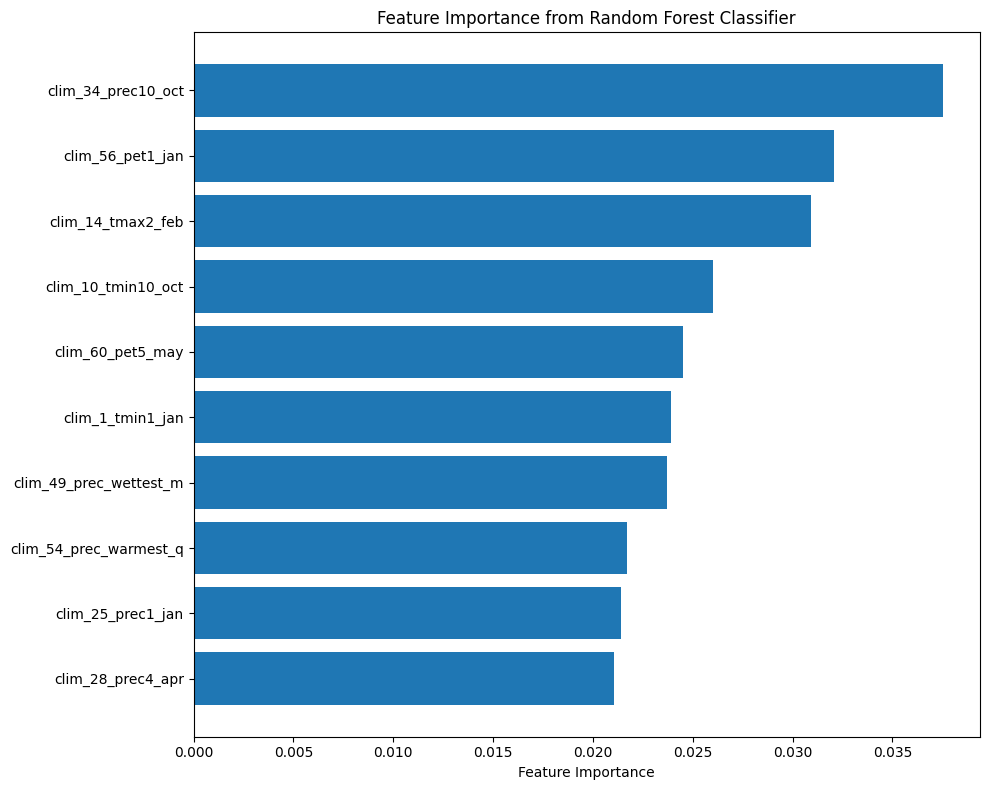

In [70]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Extract the feature names and their importance scores
feature_names = [feature for feature, importance in important_features]
importances = [importance for feature, importance in important_features]

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(feature_names)), importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.tight_layout()
plt.show()


Using entropy

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataset 'coffee_data' with 'caffeine_class' as the target variable
# Split the dataset into features (X) and target variable (y)
X = coffee_data.drop(columns=['caffeine_class'])  # Features (remove the target)
y = coffee_data['caffeine_class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier using 'entropy' as the criterion
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Sort the features by their importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the most informative features
print("Most Informative Features (based on entropy):")
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Most Informative Features (based on entropy):
Feature: clim_34_prec10_oct, Importance: 0.0555
Feature: clim_14_tmax2_feb, Importance: 0.0323
Feature: clim_56_pet1_jan, Importance: 0.0310
Feature: clim_25_prec1_jan, Importance: 0.0307
Feature: clim_60_pet5_may, Importance: 0.0233
Feature: clim_70_ndm_per_year, Importance: 0.0231
Feature: clim_1_tmin1_jan, Importance: 0.0213
Feature: clim_10_tmin10_oct, Importance: 0.0208
Feature: clim_8_tmin8_aug, Importance: 0.0204
Feature: clim_42_tmin_coldest_m, Importance: 0.0202
Feature: clim_26_prec2_feb, Importance: 0.0188
Feature: clim_16_tmax4_apr, Importance: 0.0186
Feature: clim_13_tmax1_jan, Importance: 0.0184
Feature: clim_69_cwd_annual, Importance: 0.0175
Feature: clim_41_tmax_warmest_m, Importance: 0.0172
Feature: clim_52_prec_wettest_q, Importance: 0.0169
Feature: clim_32_prec8_aug, Importance: 0.0167
Feature: clim_27_prec3_mar, Importance: 0.0166
Feature: clim_43_tannual_range, Importance: 0.0164
Feature: clim_36_prec12_dec, Importance:

In [111]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation (e.g., accuracy)
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy:  0.9175139582721128


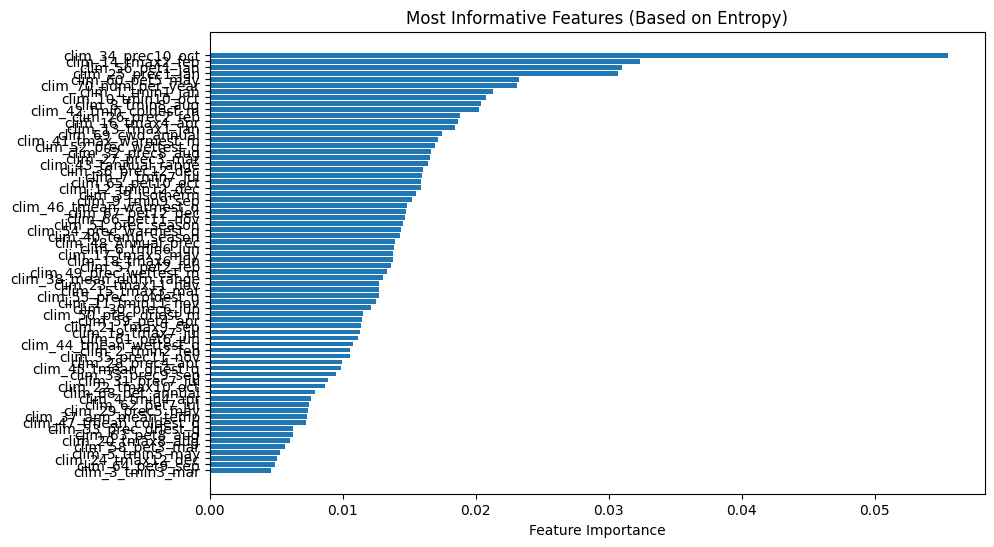

In [96]:
# Extract features and their importance for visualization
features = [feature for feature, importance in sorted_features]
importances = [importance for feature, importance in sorted_features]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Most Informative Features (Based on Entropy)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


Since many of the features are highly correlated, the importance of the the features can dilute feature importance scores, causing important features to seem less significant. 

Removing one feature from each highly correlated pair can lead to clearer and more accurate feature importance ranking

We will retrain the model after removing correlated features which may give us a better idea of which features are genuinely important for predicting caffeine class

In [92]:
import pandas as pd
import numpy as np

# Set the correlation threshold
threshold = 0.99

# Calculate the correlation matrix
correlation_matrix = coffee_data.drop(columns=['caffeine_class']).corr().abs()  # abs() for absolute values

# Create an empty list to store correlated pairs
correlated_pairs = []

# Create a mask to look at only the upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Iterate through the upper triangle and identify correlated pairs
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i, j] > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlated_pairs.append((feature1, feature2))

# Print the correlated pairs
print(correlated_pairs)
correlated_pairs


[('clim_1_tmin1_jan', 'clim_10_tmin10_oct'), ('clim_2_tmin2_feb', 'clim_11_tmin11_nov'), ('clim_2_tmin2_feb', 'clim_12_tmin12_dec'), ('clim_5_tmin5_may', 'clim_6_tmin6_jun'), ('clim_5_tmin5_may', 'clim_7_tmin7_jul'), ('clim_5_tmin5_may', 'clim_42_tmin_coldest_m'), ('clim_6_tmin6_jun', 'clim_7_tmin7_jul'), ('clim_6_tmin6_jun', 'clim_42_tmin_coldest_m'), ('clim_7_tmin7_jul', 'clim_42_tmin_coldest_m'), ('clim_13_tmax1_jan', 'clim_22_tmax10_oct'), ('clim_30_prec6_jun', 'clim_31_prec7_jul'), ('clim_32_prec8_aug', 'clim_53_prec_driest_q'), ('clim_32_prec8_aug', 'clim_55_prec_coldest_q'), ('clim_33_prec9_sep', 'clim_53_prec_driest_q'), ('clim_44_tmean_wettest_q', 'clim_46_tmean_warmest_q'), ('clim_53_prec_driest_q', 'clim_55_prec_coldest_q')]


[('clim_1_tmin1_jan', 'clim_10_tmin10_oct'),
 ('clim_2_tmin2_feb', 'clim_11_tmin11_nov'),
 ('clim_2_tmin2_feb', 'clim_12_tmin12_dec'),
 ('clim_5_tmin5_may', 'clim_6_tmin6_jun'),
 ('clim_5_tmin5_may', 'clim_7_tmin7_jul'),
 ('clim_5_tmin5_may', 'clim_42_tmin_coldest_m'),
 ('clim_6_tmin6_jun', 'clim_7_tmin7_jul'),
 ('clim_6_tmin6_jun', 'clim_42_tmin_coldest_m'),
 ('clim_7_tmin7_jul', 'clim_42_tmin_coldest_m'),
 ('clim_13_tmax1_jan', 'clim_22_tmax10_oct'),
 ('clim_30_prec6_jun', 'clim_31_prec7_jul'),
 ('clim_32_prec8_aug', 'clim_53_prec_driest_q'),
 ('clim_32_prec8_aug', 'clim_55_prec_coldest_q'),
 ('clim_33_prec9_sep', 'clim_53_prec_driest_q'),
 ('clim_44_tmean_wettest_q', 'clim_46_tmean_warmest_q'),
 ('clim_53_prec_driest_q', 'clim_55_prec_coldest_q')]

In [81]:
# Compare variance of correlated features
for feature1, feature2 in correlated_pairs:
    if coffee_data[feature1].var() > coffee_data[feature2].var():
        # Keep feature1, discard feature2
        print(f"Keeping {feature1}, discarding {feature2} (higher variance)")
    else:
        # Keep feature2, discard feature1
        print(f"Keeping {feature2}, discarding {feature1} (higher variance)")


Keeping clim_1_tmin1_jan, discarding clim_2_tmin2_feb (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_3_tmin3_mar (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_4_tmin4_apr (higher variance)
Keeping clim_8_tmin8_aug, discarding clim_1_tmin1_jan (higher variance)
Keeping clim_9_tmin9_sep, discarding clim_1_tmin1_jan (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_10_tmin10_oct (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_11_tmin11_nov (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_12_tmin12_dec (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_37_ann_mean_temp (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_45_tmean_driest_q (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_47_tmean_coldest_q (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_59_pet4_apr (higher variance)
Keeping clim_68_pet_annual, discarding clim_1_tmin1_jan (higher variance)
Keeping clim_3_tmin3_mar, discarding c

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = coffee_data.drop(columns=['caffeine_class'])  # Assuming caffeine_class is the target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     feature           VIF
0           clim_1_tmin1_jan  3.915283e+05
1           clim_2_tmin2_feb  7.531714e+05
2           clim_3_tmin3_mar  6.989463e+05
3           clim_4_tmin4_apr  3.181418e+05
4           clim_5_tmin5_may  3.080130e+05
5           clim_6_tmin6_jun  1.874330e+05
6           clim_7_tmin7_jul  2.710964e+05
7           clim_8_tmin8_aug  3.131730e+05
8           clim_9_tmin9_sep  3.109759e+05
9         clim_10_tmin10_oct  3.677723e+05
10        clim_11_tmin11_nov  8.118863e+05
11        clim_12_tmin12_dec  5.677003e+05
12         clim_13_tmax1_jan  9.684017e+05
13         clim_14_tmax2_feb  1.205058e+06
14         clim_15_tmax3_mar  1.533846e+06
15         clim_16_tmax4_apr  8.930520e+05
16         clim_17_tmax5_may  5.181503e+05
17         clim_18_tmax6_jun  4.540305e+05
18         clim_19_tmax7_jul  7.454544e+05
19         clim_20_tmax8_aug  7.205510e+05
20         clim_21_tmax9_sep  5.507788e+05
21        clim_22_tmax10_oct  9.314783e+05
22        c

In [89]:
# Filter the vif_data DataFrame to show only rows where VIF is infinity (inf)
inf_vif_features = vif_data[vif_data['VIF'] == float('inf')]

# Display the features with VIF = inf
print(len(inf_vif_features))


16


Comparing with highly correlated features

In [102]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = coffee_data.drop(columns=['caffeine_class']).corr()

# Create a mask to get the upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with a correlation coefficient greater than 0.9
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.9)]

highly_correlated_features

['clim_2_tmin2_feb',
 'clim_3_tmin3_mar',
 'clim_4_tmin4_apr',
 'clim_5_tmin5_may',
 'clim_6_tmin6_jun',
 'clim_7_tmin7_jul',
 'clim_8_tmin8_aug',
 'clim_9_tmin9_sep',
 'clim_10_tmin10_oct',
 'clim_11_tmin11_nov',
 'clim_12_tmin12_dec',
 'clim_15_tmax3_mar',
 'clim_16_tmax4_apr',
 'clim_17_tmax5_may',
 'clim_18_tmax6_jun',
 'clim_19_tmax7_jul',
 'clim_20_tmax8_aug',
 'clim_21_tmax9_sep',
 'clim_22_tmax10_oct',
 'clim_23_tmax11_nov',
 'clim_24_tmax12_dec',
 'clim_29_prec5_may',
 'clim_30_prec6_jun',
 'clim_31_prec7_jul',
 'clim_32_prec8_aug',
 'clim_33_prec9_sep',
 'clim_36_prec12_dec',
 'clim_37_ann_mean_temp',
 'clim_41_tmax_warmest_m',
 'clim_42_tmin_coldest_m',
 'clim_43_tannual_range',
 'clim_44_tmean_wettest_q',
 'clim_45_tmean_driest_q',
 'clim_46_tmean_warmest_q',
 'clim_47_tmean_coldest_q',
 'clim_48_Annual_prec',
 'clim_49_prec_wettest_m',
 'clim_50_prec_driest_m',
 'clim_51_prec_season',
 'clim_52_prec_wettest_q',
 'clim_53_prec_driest_q',
 'clim_54_prec_warmest_q',
 'clim_55

In [103]:
len(highly_correlated_features)

57

In [104]:
# Drop the highly correlated features
reduced_data = coffee_data.drop(columns=highly_correlated_features)

# Display the reduced dataset shape
print(f"Original dataset shape: {coffee_data.shape}")
print(f"Reduced dataset shape (after removing highly correlated features): {reduced_data.shape}")


Original dataset shape: (515, 71)
Reduced dataset shape (after removing highly correlated features): (515, 14)


In [120]:

reduced_data = coffee_data.drop(columns=highly_correlated_features)
reduced_data.to_csv(r'../data/reduced_data.csv')
# Display the reduced dataset shape
print(f"Original dataset shape: {coffee_data.shape}")
print(f"Reduced dataset shape (after removing highly correlated features): {reduced_data.shape}")

Original dataset shape: (515, 71)
Reduced dataset shape (after removing highly correlated features): (515, 14)


Once highly correlated values have been removed we try reclassifying features

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'caffeine_class' is your target variable and X contains the features
X = reduced_data.drop(columns=['caffeine_class'])  # Replace with actual feature columns
y = reduced_data['caffeine_class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#criterion='entropy',
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Pair feature names with their importance scores
features = X.columns
important_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Display the most important features
for feature, importance in important_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")



Feature: clim_34_prec10_oct, Importance: 0.1123
Feature: clim_14_tmax2_feb, Importance: 0.1118
Feature: clim_25_prec1_jan, Importance: 0.0950
Feature: clim_39_isotherm, Importance: 0.0831
Feature: clim_27_prec3_mar, Importance: 0.0790
Feature: clim_40_temp_season, Importance: 0.0766
Feature: clim_26_prec2_feb, Importance: 0.0711
Feature: clim_28_prec4_apr, Importance: 0.0690
Feature: clim_69_cwd_annual, Importance: 0.0666
Feature: clim_13_tmax1_jan, Importance: 0.0647
Feature: clim_1_tmin1_jan, Importance: 0.0624
Feature: clim_38_mean_diurn_range, Importance: 0.0572
Feature: clim_35_prec11_nov, Importance: 0.0512


In [113]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation (e.g., accuracy)
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy:  0.9248016456068175


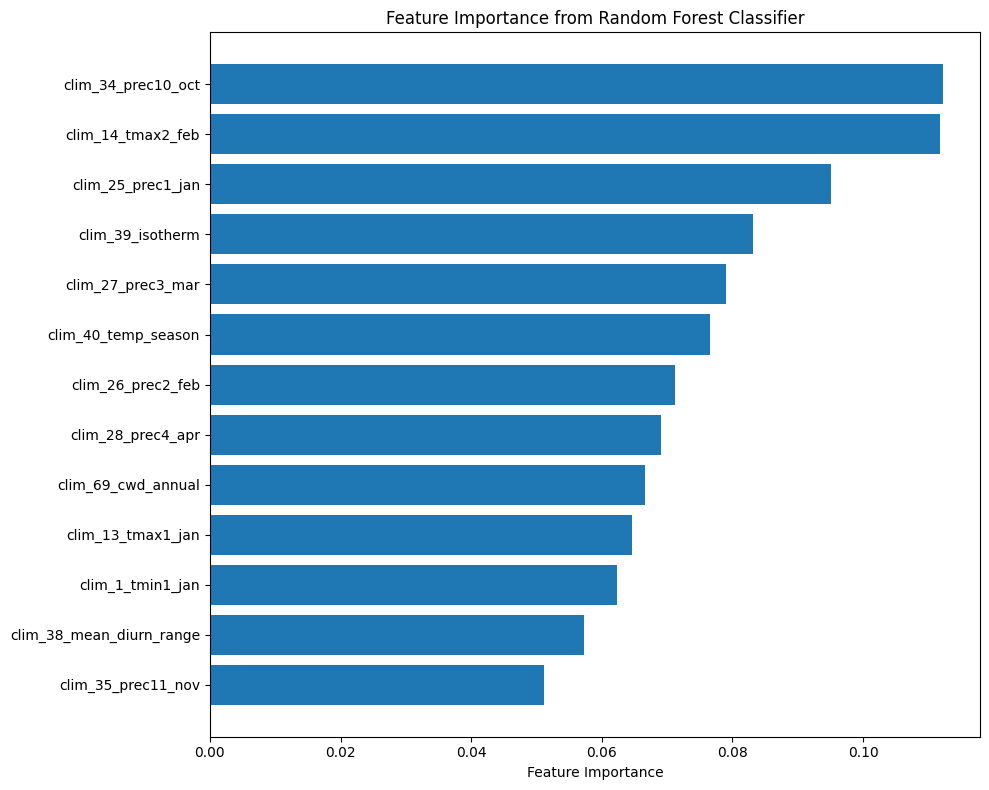

In [114]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Extract the feature names and their importance scores
feature_names = [feature for feature, importance in important_features]
importances = [importance for feature, importance in important_features]

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(feature_names)), importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.tight_layout()
plt.show()

c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores:  [0.89156627 0.93975904 0.91463415 0.96341463 0.91463415]
Mean Accuracy:  0.9248016456068175
Standard Deviation of Accuracy:  0.024600947210829966


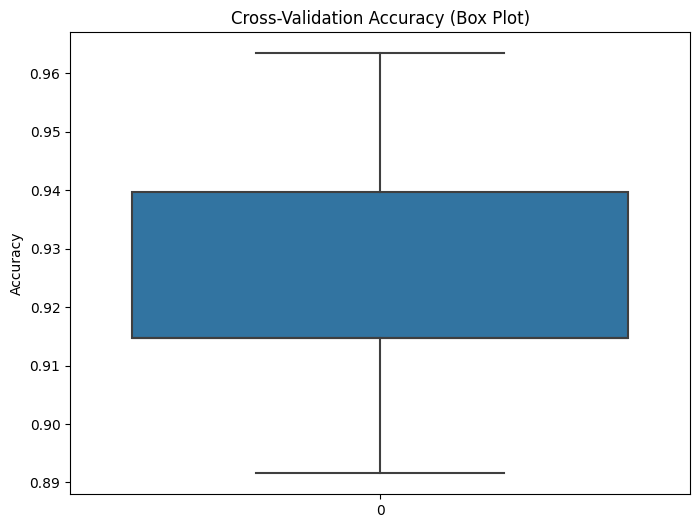

c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


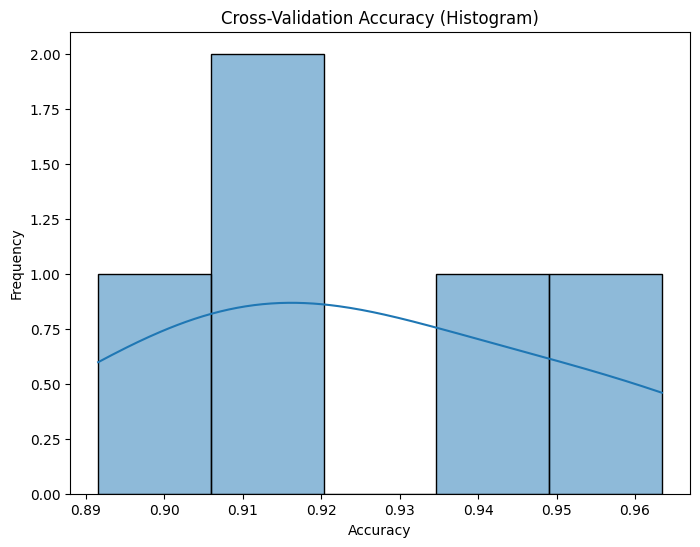

In [115]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rf_classifier' is your trained RandomForestClassifier
# and 'X_train' and 'y_train' are your feature and target datasets

# Run cross-validation to compute accuracy for each fold
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())
print("Standard Deviation of Accuracy: ", cv_scores.std())

# Visualization 1: Box Plot of Cross-Validation Scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_scores)
plt.title('Cross-Validation Accuracy (Box Plot)')
plt.ylabel('Accuracy')
plt.show()

# Visualization 2: Histogram of Cross-Validation Scores
plt.figure(figsize=(8, 6))
sns.histplot(cv_scores, bins=5, kde=True)
plt.title('Cross-Validation Accuracy (Histogram)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


In [117]:
# Run cross-validation to compute accuracy for each fold
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores: ", cv_scores)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores:  [0.89156627 0.93975904 0.91463415 0.96341463 0.91463415]


In [118]:
from sklearn.model_selection import cross_val_score

# Use F1 score for multiclass classification (with weighted average)
cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

print("Cross-Validation F1 Scores (weighted): ", cv_f1_scores)
print("Mean F1 Score: ", cv_f1_scores.mean())


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Scores (weighted):  [0.88289157 0.93398387 0.91404432 0.96316185 0.91116399]
Mean F1 Score:  0.9210491184670271


In [119]:
# Use precision score for multiclass classification (with macro average)
cv_precision_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='precision_macro')

# Use recall score for multiclass classification (with macro average)
cv_recall_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='recall_macro')

print("Cross-Validation Precision Scores (macro): ", cv_precision_scores)
print("Cross-Validation Recall Scores (macro): ", cv_recall_scores)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

Cross-Validation Precision Scores (macro):  [0.59373219 0.61997019 0.89848485 0.96060606 0.92534722]
Cross-Validation Recall Scores (macro):  [0.56464646 0.62525253 0.88761975 0.94804716 0.86109064]
